<a href="https://colab.research.google.com/github/YashBelliappa-10/PRODIGY_ML/blob/main/ML_T4_HandGesture_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import tensorflow as tf


In [50]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [3]:
#Unziping the ZIP File
from zipfile import ZipFile
file_path = "/content/Hands_G/handsGesture.zip"

with ZipFile(file_path, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [51]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
dataset_path = "/content/leapGestRecog"

In [33]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(dataset_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(dataset_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[6, 5, 6, ..., 4, 4, 4],
        [4, 5, 6, ..., 4, 4, 5],
        [6, 7, 6, ..., 4, 5, 6],
        ...,
        [6, 5, 5, ..., 4, 4, 4],
        [5, 5, 6, ..., 4, 4, 5],
        [5, 5, 5, ..., 4, 5, 4]], dtype=uint8),
 0]

In [52]:
# shuffle the input data
import random
random.shuffle(image_data)

In [53]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [59]:
label[:10]

array([4, 8, 7, 2, 6, 0, 2, 5, 7, 5])

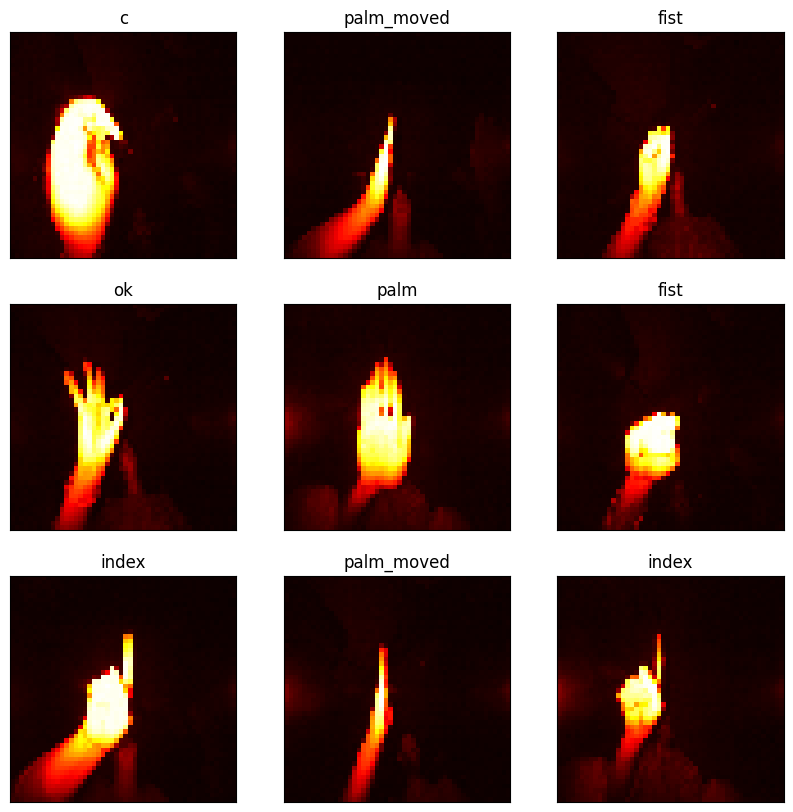

In [60]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [56]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [61]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10)  # Remove dtype argument
label = label.astype('i1')  # Convert to desired dtype after one-hot encoding
label[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int8)

In [40]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [41]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [43]:
#Model Architecture
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])
# Model Training
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 116s 259ms/step - accuracy: 0.7202 - loss: 0.8332 - val_accuracy: 0.9973 - val_loss: 0.0096
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 139s 252ms/step - accuracy: 0.9946 - loss: 0.0198 - val_accuracy: 0.9993 - val_loss: 0.0013
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 142s 254ms/step - accuracy: 0.9958 - loss: 0.0123 - val_accuracy: 0.9990 - val_loss: 0.0029
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 144s 258ms/step - accuracy: 0.9978 - loss: 0.0067 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 140s 254ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 141s 253ms/step - accuracy: 0.9992 - loss: 0.0047 - val_accuracy: 0.9998 - val_loss: 4.2979e-04
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 111s 254ms/step - accuracy: 0.9997 - loss: 9.5534e-04 - val_accuracy: 0.9998 - val_loss: 3.9977e-04


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

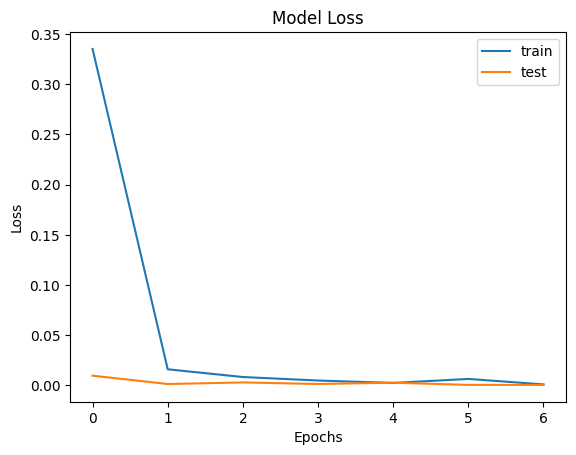

In [45]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

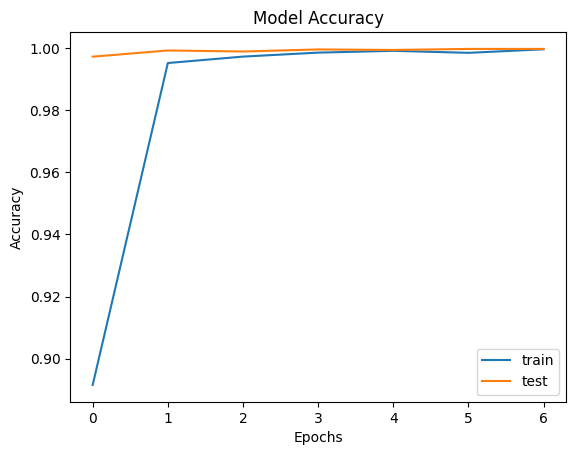

In [46]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [47]:
# Model Evaluation
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.9998 - loss: 3.9879e-04
Test accuracy: 99.98%


188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step


[]

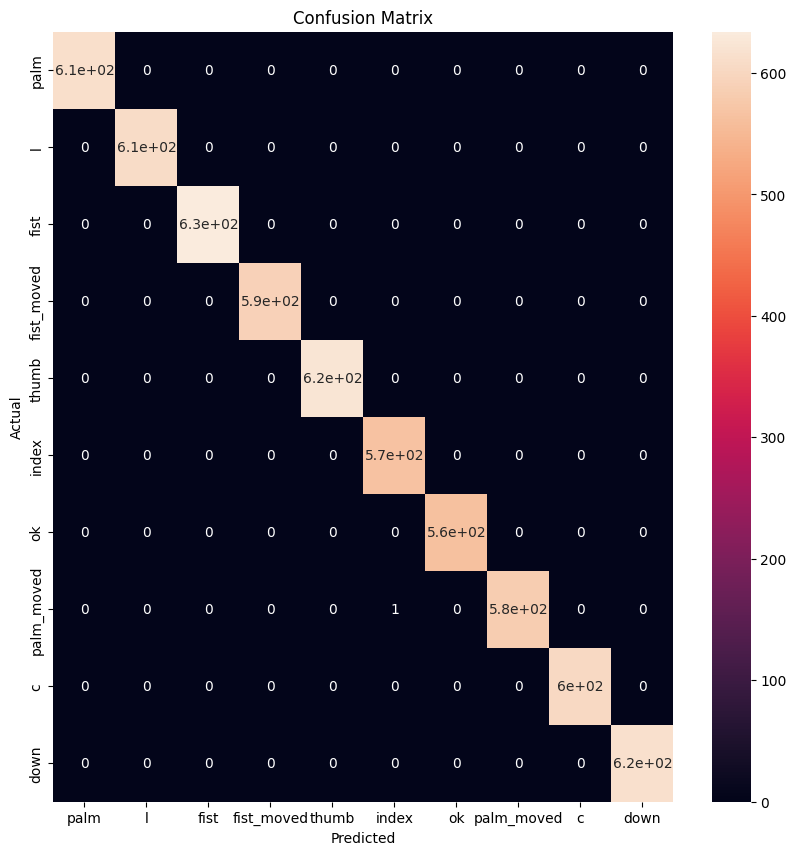

In [58]:
#Confusion Matrix and Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
#sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat, cmap='viridis') #color changed version if required use it.
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.plot()